<h1>SGDRegressor</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

<h3>概要</h3>
勾配降下法（gradient descent）は、非常に広い範囲の問題の最適解を見つけられる汎用性が高い最適化アルゴリズムである。勾配降下法の一般的な考え方は、損失関数を最小にするために、パラメータを繰り返し操作することである。パラメータベクトル$\theta$について誤差関数の局所的な勾配を測定し、下に降りて行く方向に進む。勾配が0になれば、最小値に達したということだ<br>
具体的には、$\theta$を無作為な値で初期化し（ランダム初期化）、毎回損失関数が小さくなるように、小さなステップでパラメータを動かしていく。最小値に収束するまでそれを繰り返す

<h3>学習率</h3>
勾配降下法で重要なパラメータの一つは、学習率ハイパーパラメータで定義されるステップのサイズだ。学習率が小さすぎると、収束までの反復数が増え、時間がかかることになる。それに対し、学習率が大きすぎると谷間を挟んで反対側の斜面に飛びつき、最初よりも高い位置に行ってしまう場合さえある（アルゴリズムは発散して良いソリューションを見つけられなくなる）

<h3>勾配降下法が直面する問題</h3>
・全体の最小値よりも見劣りのする局所的な最小値で収束してしまう
・収束するのに非常に長い時間がかかり、諦めるのが早すぎると、全体の最小値に到達できない

<h3>注意</h3>
勾配降下法を使うときには、全ての特徴量が同じようなスケールになるようにすべきである。そうしなければ、収束までにかかる時間がかなり長くなる

<h3>バッチ勾配降下法</h3>
勾配降下法を実装するためには、個々のモデルパラメータ$\theta_j$について損失関数の勾配を計算する必要がある。つまり、$\theta_j$をほんの僅か変更すると、損失関数がどれくらい変化するかを計算しなければならない（偏微分しなければならない）。例えば、以下は損失関数がMSEだった場合は、損失関数の偏微分及び関数の勾配ベクトルは以下のようになる<br>
損失関数の偏微分:$\frac{\partial}{\partial \theta_j}MSE(\theta)=\frac{2}{m}\Sigma_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)}){x_j}^{(i)}$<br>
関数の勾配ベクトル:$\nabla_\theta MSE(\theta)=\begin{pmatrix} \frac{\partial}{\partial \theta_0}MSE(\theta) \\ \frac{\partial}{\partial \theta_1}MSE(\theta) \\ ... \\ \frac{\partial}{\partial \theta_n}MSE(\theta) \end{pmatrix}=\frac{2}{m}X^T(X\theta - y)$<br>
この公式には、個々の勾配降下ステップに訓練セット全体のXに対する計算が含まれていることに注意しよう。このアルゴリズムがバッチ勾配降下法と呼ばれているのはそのためである。ステップごとに、訓練データ全体のバッチを使うのだ。そのため、このアルゴリズムは、訓練セットが大規模だととてつもなく遅くなる

<h3>勾配降下法のステップ</h3>
勾配ベクトルを得たとき、正の傾きの位置ならば引き算し、負の傾きの位置ならば足し算することで、パラメータは最小値に近づいていくはずだ。ここで、勾配ベクトルはそのまま足し引きするのではなく、学習率をかけて足し引きする<br>
$\theta^{(next \ step)}=\theta - \eta \nabla_\theta MSE(\theta)$<br>
パラメータを更新することの単位をステップといい、ここでステップの大きさとは$\eta \nabla_\theta MSE(\theta)$のことである

<h3>良い学習率を見つけるには</h3>
良い学習率を見つけるためには、グリッドサーチを使う。ただし、時間がかかってなかなか収束しないモデルをグリッドサーチが取り除けるように、反復回数に制限を加えるとよい。具体的には、最初は反復回数を非常に大きく設定しつつ、勾配ベクトルが小さくなったら（つまり、ノルムが許容誤差$\epsilon$という小さな値よりも小さくなったら）、アルゴリズムを中止するとよい。勾配ベクトルが小さいということは、勾配降下法が最小値に（ほとんど）到達しているということである

<h3>確率的勾配降下法</h3>
バッチ勾配降下法の最大の問題は、勾配を計算するために各ステップで訓練セットを全部使うため、訓練セットが大きいときには計算速度が極端に遅くなることだ。確率的勾配降下法（stochastic gradient descent:SGD）は、逆の極端に走り、各ステップで訓練セットから無作為に一つのインスタンスを選び出し、そのインスタンスだけを使って勾配を計算する

<h3>確率的勾配降下法の性質</h3>
この手法は確率的な性質を持つため、バッチ勾配降下法と比べてかなり不規則になる。損失関数は、最小値に達するまで緩やかに小さくなっていくのではなく、上下に動きながら、平均的に減っていくだけである。そのため、アルゴリズムが止まった時の最終的なパラメータは、十分良いものだが最適ではない<br>
損失関数がかなり不規則な時には、このような動作のために局所的な最小値の外に飛び出しやすくなるので、バッチ勾配降下法よりも確率的勾配降下法の方が全体の最小値を見つけられる確率が上がる

<h3>学習スケジュール</h3>
確率的勾配降下法の無作為性は、局所的な最小値から逃れるためには良いが、最小値に落ちつかない可能性があるという点では良くない。このジレンマを解決するために、学習率を少しずつ小さくするという方法がある。各イテレーションの学習率を決める関数を学習スケジュールと呼ぶ。学習率の下げ方が急激すぎると、局所的な最小値に引っかかったり、最小値まで到達していないのに止まってしまう危険がある。それに対し、学習率の下げ方が緩やかすぎると、長い間最小値の前後を飛び回り、早い段階で訓練を停止すると、最適とは言えない解しか得られない危険がある

<h3>確率的勾配降下法の注意点</h3>
確率的勾配降下法を使う時には、訓練インスタンスは独立同分布（IID）になっていなければならない。訓練中にインスタンスをシャッフルすれば簡単にIIDを確保できる（例えば、ここのインスタンスを無作為に選択したり、各エポックの冒頭でインスタンスをシャッフルしたりする）。インスタンスがシャッフルされておらず、例えばラベルでソートされている場合、SGDはあるラベル、次のラベル、さらにその次のラベルに合わせて最適化を始めることとなり、全体の最小値に近付いていかない

<h3>SGDRegressorクラス</h3>
sklearnを使っていてSGDで線形回帰を行いたい場合には、デフォルトで二乗誤差損失関数を最適化するSGDRegressorクラスを使えば良い

<h3>イテレーション、エポック、バッチサイズの関係</h3>
2000個の学習データについて、ミニバッチサイズを500個でミニバッチ学習する場合、(勾配降下法などによる)重み更新を4イテレーション繰り返すと1エポックである。エポックは、モデルの学習に使ったデータ数が、全データ数に到達すると1エポック、という風に数える。あくまでエポックは学習に使用したデータ'数'を見ているのであって、実際に全学習データを使ったから1エポック、というわけではないことに注意

<h3>ミニバッチ勾配降下法</h3>
ミニバッチGDは、各ステップで訓練セット全部でも、たった一つのインスタンスでもなく、ミニバッチと呼ばれる無作為に選んだインスタンスの小さな集合を使って勾配を計算する。このアルゴリズムは、SGDよりも小さな誤差でパラメータ空間を進んでいく。しかし、その分、局所的な最小値から逃れにくくなる。

<h3>バッチ、確率的、ミニバッチの比較</h3>
まず、どれも特徴量数の大小による処理速度の差異はなく、どれもスケーリングが必要となる。また、どれも最終的に最小値の近くにたどり着くが、バッチGDが本当の最小値で止まるのに対し、確率的GDとミニバッチGDはいつまでも変動がある。しかしその分、バッチGDは訓練インスタンス数が大きくなると、確率的GDやミニバッチGDと比べて処理速度が遅い

<h3>早期打ち切り</h3>
勾配降下法のような反復的な学習アルゴリズムには、検証誤差が最小値に達したところで訓練を中止する、という正則化（過学習を防ぐ）の方法がある。エポックが増えると、アルゴリズムは学習を進め、訓練セットと検証セットに対する予測誤差が下がる。しかし、しばらくすると検証誤差は下げ止まり、かえって上がっていく。これは、モデルが訓練データを過学習し始めたことを示す。早期打ち切りは、検証誤差が最小になったところで、訓練を中止する<br>
SGDRegressorインスタンスのfit()メソッドを呼び出したときに、warm_start=Trueになっていると、fit()は訓練を最初からやり直すのではなく、前回の訓練後の状態から訓練を続けることができる

<h3>バッチ勾配降下法</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# np.random.rand()は範囲[0, 1)の一様分布から値を生成
# np.c_は二次元以上の配列で、最も高次の次数の方向で要素を結合する
X = 2 * np.random.rand(100, 1)
print(X.shape)
y = 4 + 3 * X + np.random.randn(100, 1)
print(y.shape)
X_b = np.c_[np.ones((100, 1)), X]
print(X_b.shape)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

(100, 1)
(100, 1)
(100, 2)


In [3]:
# 損失関数がMSEの場合
eta = 0.1 # 学習率
n_iterations = 1000
m = 100 # データ数

theta = np.random.randn(2, 1) # パラメータをランダムに初期化
print(theta.shape)
print(X_b.dot(theta).shape)
print((X_b.dot(theta) - y).shape)
print(X_b.T.shape)
print(X_b.T.dot(X_b.dot(theta) - y).shape)
print((2/m * X_b.T.dot(X_b.dot(theta) - y)).shape)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

(2, 1)
(100, 1)
(100, 1)
(2, 100)
(2, 1)
(2, 1)


In [4]:
print(theta)
print(X_new_b)
print(X_new_b.dot(theta))

[[4.07191524]
 [2.80938305]]
[[1. 0.]
 [1. 2.]]
[[4.07191524]
 [9.69068135]]


In [5]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

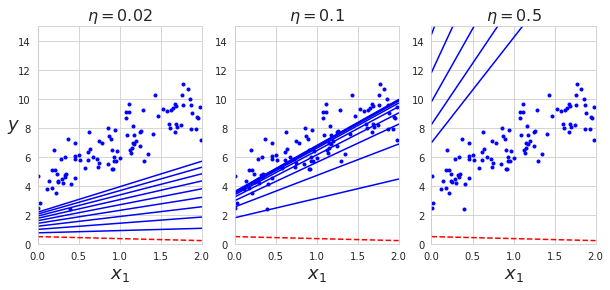

In [6]:
# 学習率の違いによるiterationごとの(X_new_b, y_predict)の2点を通る直線の変化を見てみる（iteration<10の場合だけplot）
# 左は学習率が低いため、いずれは解にたどり着くだろうが、時間がかかる
# 中央は、数回イテレーションを繰り返しただけですでに解に収束しているため、良い感じに見える
# 右が学習率が高すぎるため、アルゴリズムは発散しており、あちこちに飛び回った挙句に、ステップを踏むごとに解から離れていく
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

<h3>確率的勾配降下法</h3>

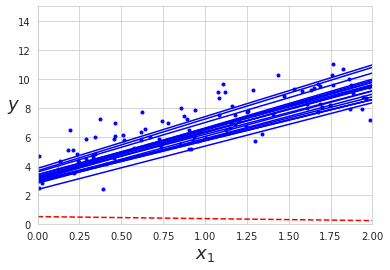

In [7]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50 # 学習スケジュールを決めるハイパーパラメータ

# 学習率は徐々に下がっていく
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # パラメータの初期化

# 最初のepochの最初の20イテレーション（ステップ）までの(X_new_b, y_predict)の2点を通る直線
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m) # ここでランダムに1点取得している
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # 学習率の更新
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
print(theta)

[[4.0443807 ]
 [2.83654817]]


In [9]:
# SGDRegressorクラスを使う（確率的勾配降下法）
# 学習率（eta0）は 0.1, 正則化項（penalty）は None
# このモデルは、学習スケジュールがデフォルト（eta = eta0 / pow(t, power_t), power_tdouble, default=0.25）で、1エポックの損失が0.001未満になるか、1000エポック（max_iter = 1000）になるまで実行される
# max_'iter'と言っているが、これは要はepoch数を指す
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.06113962] [2.81118592]


<h3>ミニバッチ勾配降下法</h3>

In [10]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
# 徐々に学習率が下がっていく
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    # np.random.permutation()は、配列を引数に渡すと、配列の要素をランダムに並び替える。intを引数に渡すと、np.arange($int$)の要素をランダムに並び替える
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    # ここではミニバッチごとにデータの重複が出ないようにしている
    for i in range(0, m ,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [11]:
print(theta)

[[4.04159023]
 [2.75886196]]


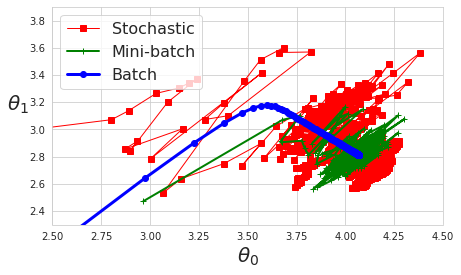

In [12]:
# どれも最終的に最小値の近くにたどり着くが、バッチGDが本当の最小値で止まるのに対し、確率的GDとミニバッチGDはいつまでも変動がある。
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

<h3>早期打ち切り</h3>

In [13]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty,
                       warm_start = True, penalty = None,
                       learning_rate = "constant",
                       eta0 = 0.0005, random_state = 42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

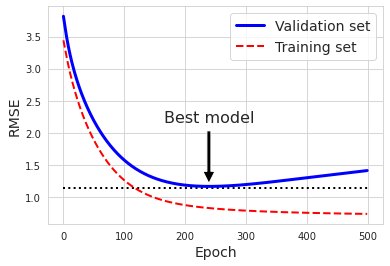

In [15]:
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty,
                       warm_start = True, penalty = None, 
                       learning_rate = "constant", eta0 = 0.0005,
                       random_state = 42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [16]:
print(best_epoch)
print(best_model)

239
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)


<h1>SGDClassifier</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn-linear-model-sgdclassifier

<h3>概要</h3>
分類器は、まず手始めに、sklearnのSGDClassifierクラスを使って、確率的勾配降下法の分類器から試してみるといいかもしれない。この分類器は、（SGDRegressorでも述べたように）SGDが訓練インスタンスを一度に一つずつ独立に扱うため（そのため、SGDはオンライン学習にも向いている）、大規模なデータセットを効率よく扱えるという長所がある

<h3>SGDClassifierクラスのデフォルトの損失関数</h3>
SGDClassifierクラスは、デフォルトで損失関数が"hinge"に設定されている。これはつまり、linearSVM分類器と同じである

In [17]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1, as_frame = False)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [18]:
# 28*28の画像が70000枚ある
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


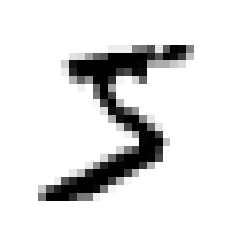

In [19]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")
plt.show()

In [20]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

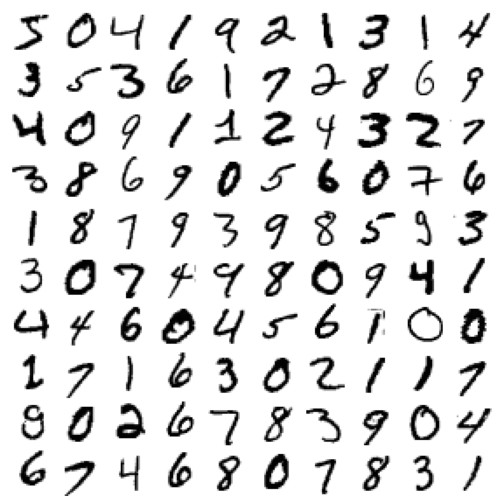

In [21]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state = 42)
sgd_clf.fit(X_train, y_train_5)
print(sgd_clf.predict([X[0]]))
print(y[0])

[ True]
5


In [24]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy"))

[0.95035 0.96035 0.9604 ]
